# 19.1//Bias Any Stretch of the Imagination
## 19.1.1//Living the sample life
Let's consider the problem of counting how many people live in France. The standard approach is to take a **census.** This means contacting every household and asking how many people live there.<br>In 1786, Pierre-Simon Laplace realized you could estimate the population with less effort. Rather than asking every household who lived there, he asked a small number of households and used statistics to estimate the number of people in the whole population. This technique of working with a **subset** of the whole population is called **sampling.**

In [1]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [202]:
import pandas as pd
import numpy as np

def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

import matplotlib.pyplot as plt
spotify_population=pd.read_feather('G:\\datacamp\\19.Sampling in Python\\spotify_2000_2020.feather')
coffee_ratings=pd.read_feather('G:\\datacamp\\19.Sampling in Python\\coffee_ratings_full.feather')
attrition_pop=pd.read_feather('G:\\datacamp\\19.Sampling in Python\\attrition.feather')
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


#### Simple sampling with pandas
Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

#### e1//Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.
**Sample 1000 rows from spotify_population, assigning to spotify_sample<br>Calculate the mean duration in minutes from spotify_population using pandas.
Calculate the mean duration in minutes from spotify_sample using pandas.**

In [3]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample.head())

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                         artists  danceability  \
34429      0.017200          ['Tenth Avenue North']         0.508   
26212      0.036700           ['Sublime With Rome']         0.677   
27647      0.106000  ['Dru Hill', 'Jermaine Dupri']         0.828   
25889      0.000652              ['Jonas Brothers']         0.471   
30798      0.597000                     ['Berhana']         0.543   

       duration_ms  duration_minutes  energy  explicit  \
34429     217400.0          3.623333   0.589       0.0   
26212     232813.0          3.880217   0.716       0.0   
27647     242360.0          4.039333   0.654       0.0   
25889     197507.0          3.291783   0.875       0.0   
30798     261103.0          4.351717   0.298       1.0   

                           id  instrumentalness   key  liveness  loudness  \
34429  72VNLbfQELdPaKMTNjT2eB          0.000000   7.0    0.1290    -7.204   
26212  0qdnPX9umHlQBQuv2sYZlo          0.000000   9.0    0.1480    -6.312   
27647

#### e2//Simple sampling and calculating with NumPy
You can also use numpy to calculate parameters or statistics from a list or pandas Series.
You'll be turning it up to eleven and looking at the loudness property of each song. and calculate their mean

In [4]:
# Subset the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Print the sample
print(loudness_samp.head())
# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

40443   -4.011
36298   -5.469
5263    -3.933
14815   -7.800
30972   -7.260
Name: loudness, dtype: float64
-7.366856851353918
-7.74751


## 19.1.2//A little too convenient
**sample bias:** In 1936, a newspaper called The Literary Digest ran an extensive poll to try to predict the next US presidential election. They phoned ten million voters and had over two million responses. About one-point-three million people said they would vote for Landon, and just under one million people said they would vote for Roosevelt. That is, Landon was predicted to get fifty-seven percent of the vote, and Roosevelt was predicted to get forty-three percent of the vote. Since the sample size was so large, it was presumed that this poll would be very accurate. However, in the election, Roosevelt won by a landslide with sixty-two percent of the vote. So what went wrong? Well, in 1936, telephones were a luxury, so the only people who had been contacted by The Literary Digest were relatively rich. The sample of voters was not representative of the whole population of voters, and so the poll suffered from sample bias. The data was collected by the easiest method, in this case, telephoning people. This is called convenience sampling and is often prone to sample bias. Before sampling, we need to think about our data collection process to avoid biased results.

In [5]:
print(coffee_ratings["total_cup_points"].mean())
coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10["total_cup_points"].mean()

82.15120328849018


89.1

 One form of convenience sampling would be to take the first ten rows, rather than the random rows we saw in the previous video. We can take the first 10 rows with the pandas head method. The mean cup points from this sample is higher at eighty-nine. The discrepancy suggests that coffees with higher cup points appear near the start of the dataset. Again, the convenience sample isn't representative of the whole population.<br>
    Now come hist. it is a great way to visualize the selection bias.We can create a histogram of the total cup points from the population, which contains values ranging from around 59 to around 91. The numpy-dot-arange function can be used to create bins of width 2 from 59 to 91.

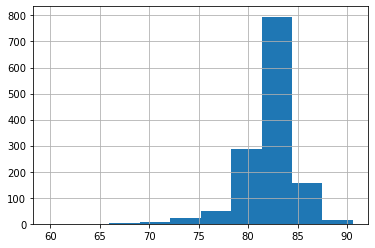

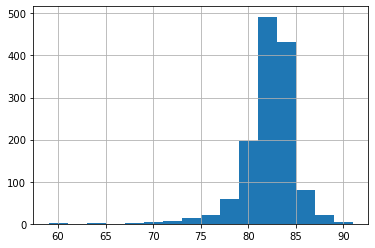

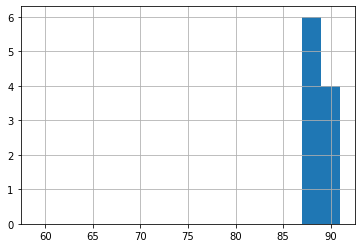

In [6]:
import matplotlib.pyplot as plt
plt.clf()
coffee_ratings["total_cup_points"].hist()
plt.show()
coffee_ratings["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()
coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

Now see how the sample has been changed when random saple is being used. Notice how the shape of the distributions is more closely aligned when random sampling is used.

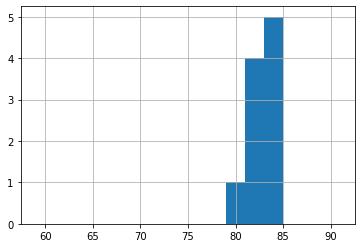

In [99]:
coffee_sample = coffee_ratings.sample(n=10)
coffee_sample["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

### Are the findings from this sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.
**e1//Plot a histogram of the acousticness from spotify_population with bins of width 0.01 from 0 to 1 using pandas .hist().<br>e2//Update the histogram code to use the spotify_mysterious_sample dataset.<br>e3//

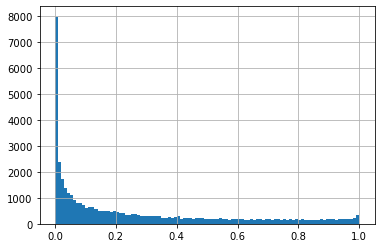

In [8]:
spotify_population['acousticness'].hist(bins=np.arange(0,1.01,.01))  ## first used 2, that was wrong
plt.show()

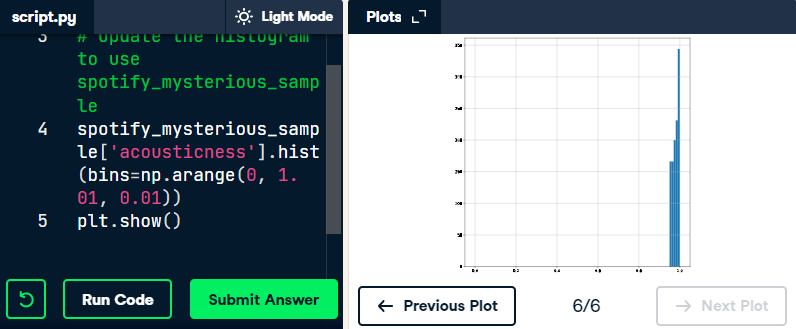
Are the acousticness values in the sample generalizable to the general population?<br>
No. The acousticness samples are consistently higher than those in the general population.

### E2//Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

spotify_population and spotify_mysterious_sample2 are available; pandas, matplotlib.pyplot, and numpy are loaded using their standard aliases.

e1//Plot a histogram of duration_minutes from spotify_population with bins of width 0.5 from 0 to 15 using pandas .hist().

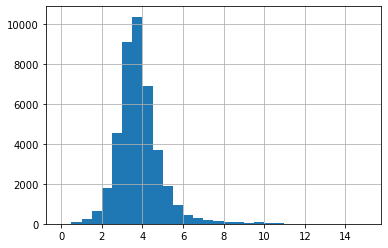

In [9]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0,15.5,.5))
plt.show()

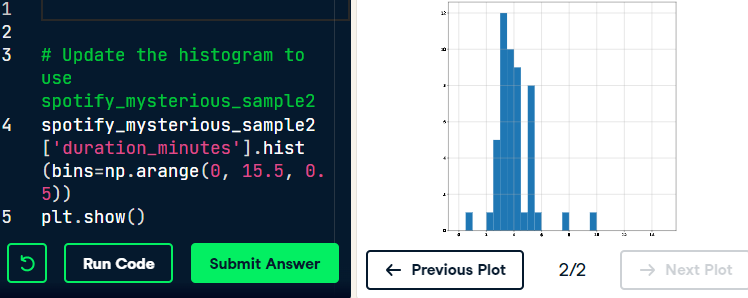
 
 Are the duration values in the sample generalizable to the general population?
    Yes. Any sample should lead to a generalizable result about the population.

Yes. The sample selected is likely a random sample of all songs in the population.(correct)

No. Samples can never lead to generalizable results about the population.

No. The duration samples are consistently higher than those in the general population.

No. The duration samples are consistently lower than those in the general population.

## 19.1.3//How does Sue(psuedo) do sampling?
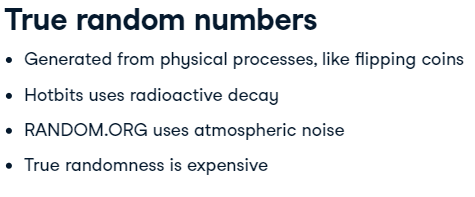
That's why we mainly use pseudo random numbers

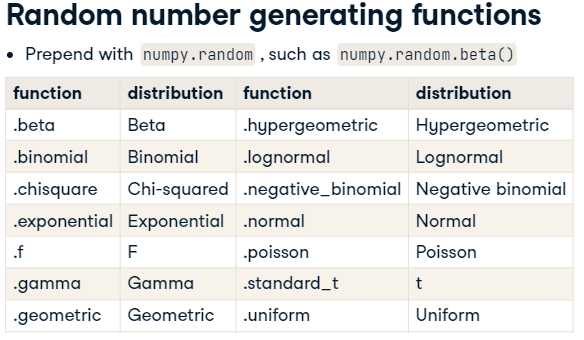

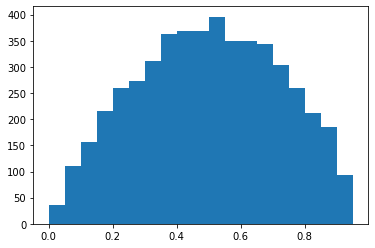

In [10]:
randoms = np.random.beta(a=2, b=2, size=5000)
plt.hist(randoms, bins=np.arange(0, 1, 0.05))
plt.show()   ### beta distribution. all number from 0-1

### E//Generating random numbers
You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.
**e1//Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to<br>e2//**

In [11]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)
# Print uniforms
print(uniforms)
normals = np.random.normal(loc=5,scale=2,size=5000)
print(normals)

[-0.33715869 -0.65833606 -1.77682601 ...  2.02074447 -0.82053157
 -1.72083369]
[4.6708248  5.91494026 3.96132071 ... 4.41661778 2.31987776 1.89400086]


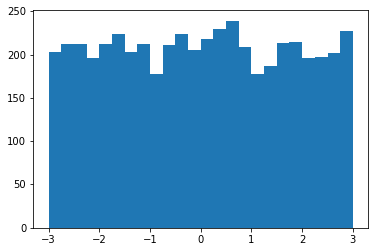

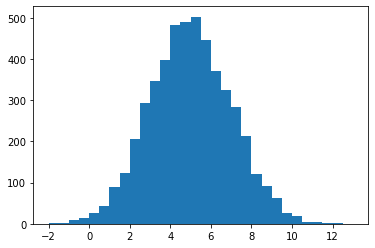

In [12]:
plt.clf()
plt.hist(uniforms,bins=np.arange(-3,3.25,.25))
plt.show()
plt.hist(normals,bins=np.arange(-2,13.5,.5))
plt.show()

# 19.2//Don't get theory eyed
## Simple is as simple does(simple random sampling and systematic random sampling)
### Random Sampling
To perform simple random sampling, we take some at random, one at a time. Each coffee has the same chance as any other of being picked. When using this technique, sometimes we might end up with two coffees that were next to each other in the dataset, and sometimes we might end up with large areas of the dataset that were not selected from at all. 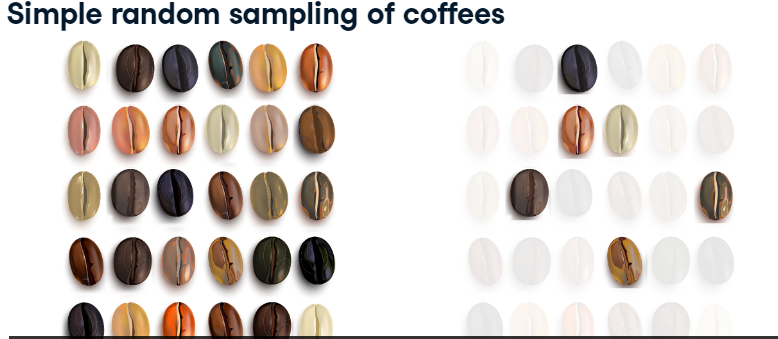

Why random_state??? https://stackoverflow.com/questions/45211624/what-exactly-does-the-pandas-random-state-do

In [13]:
coffee_ratings.sample(n=5, random_state=19000113)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


### Systematic Sample
Systematic sampling with pandas is slightly trickier than simple random sampling. The tricky part is determining how big the interval between each row should be for a given sample size.<br>Suppose we want a sample size of five coffees. The population size is the number of rows in the whole dataset, and in this case, it's one thousand three hundred and thirty-eight. The interval is the population size divided by the sample size, but because we want the answer to be an integer, we perform integer division with two forward slashes.
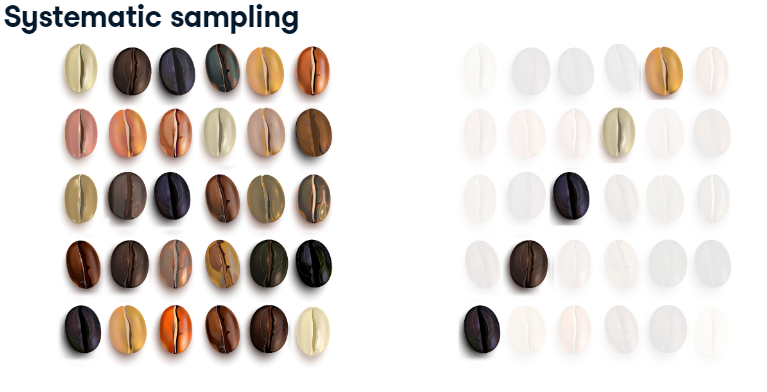

In [14]:
sample_size = 5
pop_size = len(coffee_ratings)
print(pop_size)
interval = pop_size // sample_size
print(interval)
coffee_ratings.iloc[::interval]

1338
267


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


### Systematic sampling is only safe if we don't see a pattern in scatter
There is a problem with systematic sampling, though. Suppose we are interested in statistics about the aftertaste attribute of the coffees. To examine this, first, we use reset_index to create a column of index values in our DataFrame that we can plot. Plotting aftertaste against index shows a pattern. Earlier rows generally have higher aftertaste scores than later rows. This introduces bias into the statistics that we calculate. In general, it is only safe to use systematic sampling if a plot like this has no pattern; that is, **it just looks like noise.

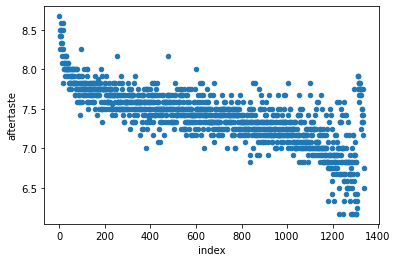

In [15]:
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

### frac// hoe to make a noisy data
**To ensure that systematic sampling is safe, we can randomize the row order before sampling. dot-sample has an argument named frac that lets us specify the proportion of the dataset to return in the sample, rather than the absolute number of rows that n specifies. Setting frac to one randomly samples the whole dataset. In effect, this randomly shuffles the rows. Next, the indices need to be reset so that they go in order from zero again. **

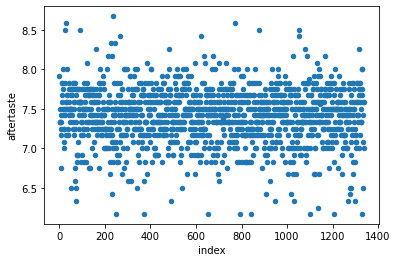

In [16]:
shuffled = coffee_ratings.sample(frac=1)  ### frAC ROW OLOT PALOT KORE
shuffled = shuffled.reset_index(drop=True).reset_index()### remember>> drop=True jei row jemne olot palot korse ta thik kore
shuffled.plot(x="index", y="aftertaste", kind="scatter") 
plt.show()

#### E//Simple random sampling
The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [17]:
attrition_pop.head()
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70,random_state=18900217)
# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

#### E//Systematic sampling
One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

In [18]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size//sample_size
# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

#### E//Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.
**Add an index column to attrition_pop, assigning the result to attrition_pop_id.
Create a scatter plot of YearsAtCompany versus index for attrition_pop_id using pandas .plot()**

In [19]:
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


   index  Age  Attrition     BusinessTravel  DailyRate            Department  \
0      0   21        0.0      Travel_Rarely        391  Research_Development   
1      1   19        1.0      Travel_Rarely        528                 Sales   
2      2   18        1.0      Travel_Rarely        230  Research_Development   
3      3   18        0.0      Travel_Rarely        812                 Sales   
4      4   18        1.0  Travel_Frequently       1306                 Sales   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                15        College  Life_Sciences                    High   
1                22  Below_College      Marketing               Very_High   
2                 3       Bachelor  Life_Sciences                    High   
3                10       Bachelor        Medical               Very_High   
4                 5       Bachelor      Marketing                  Medium   

   ... PerformanceRating  RelationshipSatisfaction Stock

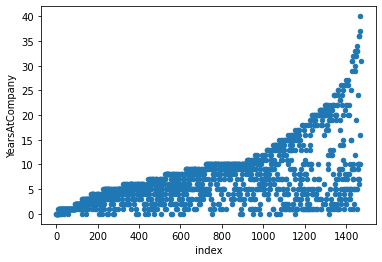

In [20]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()   ## creeate a column index
print(attrition_pop_id.head())
# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(y='YearsAtCompany',x='index',kind='scatter')
plt.show()

**Randomly shuffle the rows of attrition_pop.
Reset the row indexes, and add an index column to attrition_pop.
Repeat the scatter plot of YearsAtCompany versus index, this time using attrition_shuffled.

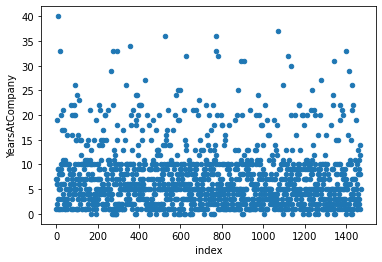

In [21]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()  ##agertadrop then abar reset

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index',y='YearsAtCompany',kind='scatter')
plt.show()

## 19.2.2//stratisfaction
Stratified sampling is a technique that allows us to sample a population that contains subgroups. We can group the coffees by country.

In [22]:
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

In [23]:
top_counted_countries = ["Mexico", "Colombia", "Guatemala",
"Brazil", "Taiwan", "United States (Hawaii)"]
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]
coffee_ratings_top.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,None,...,Bluish-Green,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
13,87.92,Arabica,grounds for health admin,United States (Hawaii),arianna farms,None,None,None,None,2000 ft,...,None,2.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.6,609.6,609.6
22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,1320,...,Green,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.0,1320.0,1320.0
25,86.92,Arabica,nucoffee,Brazil,fazenda kaquend,None,None,002/1251/0073,nucoffee,1250m,...,Green,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.0,1250.0,1250.0


Let's take a ten percent simple random sample of the dataset using dot-sample with frac set to zero-point-one. We also set the random_state argument to ensure reproducibility. As with the whole dataset, we can look at the counts for each country. To make comparisons easier, we set normalize to True to convert the counts into a proportion, which shows what proportion of coffees in the sample came from each country.

In [24]:
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
print(coffee_ratings_samp['country_of_origin'].value_counts(normalize=True))

Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: country_of_origin, dtype: float64


Comparing proportions
Here are the proportions for the population and the ten percent sample side by side. Just by chance, in this sample, Taiwanese coffees form a disproportionately low percentage. **The different makeup of the sample compared to the population could be a problem if we want to analyze the country of origin, for example. (((jodio amar kase usa er ta beshi differ lagtese)))

In [25]:
print(coffee_ratings_top['country_of_origin'].value_counts(normalize=True))

Mexico                    0.268182
Colombia                  0.207955
Guatemala                 0.205682
Brazil                    0.150000
Taiwan                    0.085227
United States (Hawaii)    0.082955
Name: country_of_origin, dtype: float64


### Proportional stratified sampling
Here we can do stratified. may be in two ways. first,, our well known groupby method. at first use groupby then frac.((( emne taiwan or usa 2 tai better result dise)))

In [26]:
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin")\
.sample(frac=0.1, random_state=2021)
coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)

Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

### Equal counts stratified sampling
One variation of stratified sampling is to sample equal counts from each group, rather than an equal proportion. The code only has one change from before. This time, we use the n argument in dot-sample instead of frac to extract fifteen randomly-selected rows from each country. 

In [27]:
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin")\
.sample(n=15, random_state=2021)
coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64

### Weighted random sampling
A close relative of stratified sampling that provides even more flexibility is weighted random sampling. In this variant, we create a column of weights that adjust the relative probability of sampling each row. .how?/ see example **np.where(condition,2,1)///// Using the where function from NumPy, we can set a weight of two for rows that match the condition and a weight of one for rows that don't match the condition. This means when each row is randomly sampled, Taiwanese coffees have two times the chance of being picked compared to other coffees.

In [28]:
coffee_ratings_weight = coffee_ratings_top
condition = coffee_ratings_weight['country_of_origin'] == "Taiwan"
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)      #####
coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")
coffee_ratings_weight

C:\Users\hp\AppData\Local\Temp\ipykernel_19300\1787561238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_weight['weight'] = np.where(condition, 2, 1)      #####


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,weight
1235,78.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,大鋤花間 (hoe vs. flower coffee farm),2017台南市精品咖啡評鑑批次 Specialty Coffee Evaluation of...,大鋤花間 (hoe vs. flower coffee farm),Taiwan,taiwan coffee laboratory,650,...,4.0,"June 6th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,650.00,650.00,650.00,2
326,83.67,Arabica,juan luis alvarado romero,Guatemala,la union monte verde,None,beneficio ixchel,11/23/0634,"unex guatemala, s.a.",4300,...,3.0,"May 30th, 2014",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1310.64,1310.64,1310.64,1
941,81.42,Arabica,juan luis alvarado romero,Guatemala,santo tomas pachuj,None,humedo: finca santo tomas pachuj y seco: benef...,11/752/02,cafcom,1550 mts.,...,6.0,"May 26th, 2015",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1550.00,1550.00,1550.00,1
1115,80.08,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,好自在咖啡莊園,None,好自在咖啡莊園,Taiwan台灣,宸嶧國際,850公尺,...,0.0,"November 23rd, 2015",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,850.00,850.00,850.00,2
885,81.67,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,mu he zi coffee 木盒子咖啡園,None,mu he zi coffee 木盒子咖啡園,None,blossom valley宸嶧國際,150 m,...,0.0,"December 26th, 2014",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,150.00,150.00,150.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,82.17,Arabica,ipanema coffees,Brazil,rio verde,None,ipanema comercial e exportadora sa,002/4177/0164,ipanema coffees,1,...,1.0,"October 7th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,1.00,1.00,1.00,1
73,85.42,Arabica,nucoffee,Brazil,fazenda serra de três barras,None,None,002/1251/0072,nucoffee,1250m,...,1.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.00,1250.00,1250.00,1
507,83.00,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,雅慕伊,None,雅慕伊,Taiwan台灣,宸嶧國際,1200,...,0.0,"November 23rd, 2015",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1200.00,1200.00,1200.00,2
169,84.50,Arabica,daniel friedlander,Brazil,None,None,mmm,mmm,None,mmm,...,4.0,"March 22nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,NaN,NaN,NaN,1


In [29]:
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

Guatemala                 0.238636
Colombia                  0.181818
Brazil                    0.181818
Mexico                    0.159091
Taiwan                    0.136364
United States (Hawaii)    0.102273
Name: country_of_origin, dtype: float64

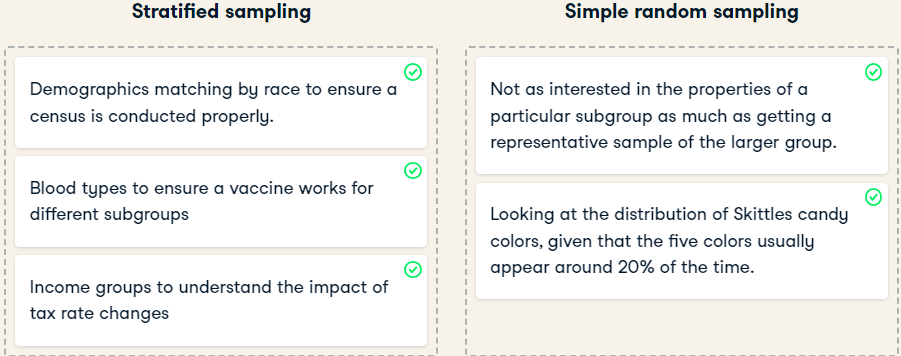

### E1//Proportional stratified sampling
If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

attrition_pop is available; pandas is loaded with its usual alias.
**e1//Get the proportion of employees by Education level from attrition_pop<br>e2///Use proportional stratified sampling on attrition_pop to sample 40% of each Education group, setting the seed to 2022<br>e3//Get the proportion of employees by Education level from attrition_strat

In [30]:
attrition_pop.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [31]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)
print('############attrition_strat#########',attrition_strat.head())
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64
############attrition_strat#########       Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Below_College           Medical   
407                  2  Below_College     Life_Sciences   
1233                 1  Below_College     Life_Sciences   
366                 10  Below_College     Life_Sciences   
702                 24  Below_College  Technical_

### E2//Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.
**e1//Use equal counts stratified sampling on attrition_pop to get 30 employees from each Education group, setting the seed to 2022.<br>e2//Get the proportion of employees by Education level from attrition_eq.

In [32]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education').sample(n=30,random_state=2022)
# Print the sample
#print(attrition_eq.head())

In [33]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


In [34]:
print(type(attrition_pop.groupby('Education')))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


### E3//Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.
**e1//Plot YearsAtCompany from attrition_pop as a histogram with bins of width 1 from 0 to 40.<br>e2//Sample 400 employees from attrition_pop weighted by YearsAtCompany<br>e3//Plot YearsAtCompany from attrition_weight as a histogram with bins of width 1 from 0 to 40.<br>e4//Which is higher? The mean YearsAtCompany from attrition_pop or the mean YearsAtCompany from attrition_weight(calculate)

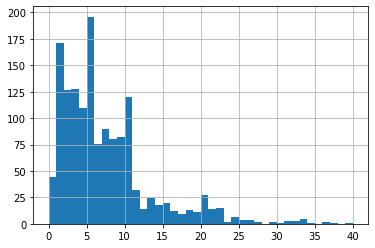

      Age  Attrition     BusinessTravel  DailyRate            Department  \
176    27        0.0      Travel_Rarely       1220  Research_Development   
1351   45        0.0      Travel_Rarely       1038  Research_Development   
956    29        0.0  Travel_Frequently        574  Research_Development   
1360   45        0.0      Travel_Rarely        252  Research_Development   
349    24        1.0      Travel_Rarely       1448                 Sales   

      DistanceFromHome      Education    EducationField  \
176                  5       Bachelor     Life_Sciences   
1351                20       Bachelor           Medical   
956                 20  Below_College           Medical   
1360                 1       Bachelor             Other   
349                  1  Below_College  Technical_Degree   

     EnvironmentSatisfaction  Gender  ...  PerformanceRating  \
176                     High  Female  ...          Excellent   
1351                  Medium    Male  ...          Excellent

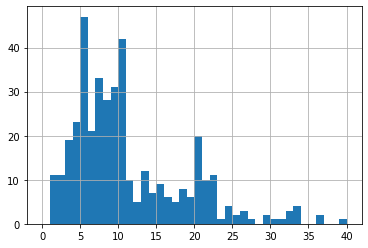

In [35]:
plt.clf()
# Plot YearsAtCompany from attrition_pop as a histogram       e1
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()
# Sample 400 employees weighted by YearsAtCompany                   e2
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")
print(attrition_weight.head())
# Plot YearsAtCompany from attrition_weight as a histogram          e3
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

## 19.2.3// What a cluster...
One problem with stratified sampling is that we need to collect data from every subgroup. In cases where collecting data is expensive, for example, when we have to physically travel to a location to collect it, it can make our analysis prohibitively expensive. There's a cheaper alternative called **cluster sampling.**
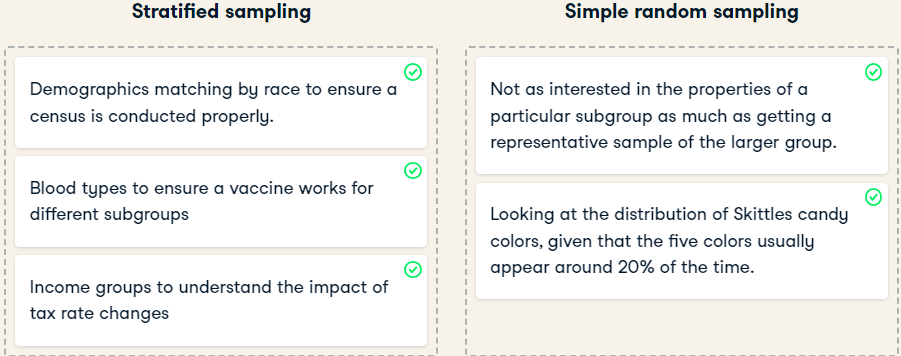
There are two stages in cluster sampling.<br><i>**Stage 1: sampling for subgroups:**</i>

In [36]:
import random
varieties_pop = list(coffee_ratings['variety'].unique())
print(varieties_pop)
varieties_samp = random.sample(varieties_pop, k=3)
varieties_samp

[None, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe', 'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona', 'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica', 'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas', 'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms', 'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe', 'Pache Comun']


['Hawaiian Kona', 'Ruiru 11', 'Ethiopian Heirlooms']

<i>**Stage 2: sampling each group:**</i>
The second stage of cluster sampling is to perform simple random sampling on each of the three varieties we randomly selected. We first filter the dataset for rows where the variety is one of the three selected, using the dot-isin method..To ensure that the isin filtering removes levels with zero rows, we apply the cat-dot-remove_unused_categories method on the Series of focus, which is variety here

In [37]:
variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition]
print('################',coffee_ratings_cluster['variety'])
print(type(coffee_ratings_cluster['variety']))

################ 36            Hawaiian Kona
64            Hawaiian Kona
72            Hawaiian Kona
91            Hawaiian Kona
117           Hawaiian Kona
176           Hawaiian Kona
205           Hawaiian Kona
237           Hawaiian Kona
308           Hawaiian Kona
357                Ruiru 11
390           Hawaiian Kona
405           Hawaiian Kona
411           Hawaiian Kona
430           Hawaiian Kona
461           Hawaiian Kona
486           Hawaiian Kona
488           Hawaiian Kona
490           Hawaiian Kona
491           Hawaiian Kona
537     Ethiopian Heirlooms
556           Hawaiian Kona
596           Hawaiian Kona
597           Hawaiian Kona
604           Hawaiian Kona
672           Hawaiian Kona
682                Ruiru 11
744           Hawaiian Kona
786           Hawaiian Kona
792           Hawaiian Kona
851           Hawaiian Kona
894           Hawaiian Kona
997           Hawaiian Kona
1018          Hawaiian Kona
1035          Hawaiian Kona
1076          Hawaiian Kona
109

In [38]:
coffee_ratings_cluster['variety']=coffee_ratings_cluster['variety'].astype('category')
coffee_ratings_cluster.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_19300\1209943454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['variety']=coffee_ratings_cluster['variety'].astype('category')


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
36,86.25,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,220452,kona pacific farmers cooperative,None,...,None,4.0,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
64,85.58,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,220451,kona pacific farmers cooperative,None,...,None,1.0,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
72,85.42,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,220453,kona pacific farmers cooperative,None,...,None,6.0,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
91,85.08,Arabica,eileen koyanagi,United States (Hawaii),None,None,None,KP 022014,kona pacific farmers cooperative,None,...,Bluish-Green,2.0,"March 10th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
117,84.83,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,220457,kona pacific farmers cooperative,None,...,None,15.0,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN


Example e(pdf/video) te jemne dewa ase oivabe hoy nai. category type kora lagse age. naile result ashteesilo na/////
Value Error :Cannot take sample than population when ‘replace=false’

In [40]:
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()
coffee_ratings_cluster.groupby("variety").sample(n=5, random_state=2021,replace=True)
print(coffee_ratings_cluster.variety)
coffee_ratings_cluster.head(10)

36            Hawaiian Kona
64            Hawaiian Kona
72            Hawaiian Kona
91            Hawaiian Kona
117           Hawaiian Kona
176           Hawaiian Kona
205           Hawaiian Kona
237           Hawaiian Kona
308           Hawaiian Kona
357                Ruiru 11
390           Hawaiian Kona
405           Hawaiian Kona
411           Hawaiian Kona
430           Hawaiian Kona
461           Hawaiian Kona
486           Hawaiian Kona
488           Hawaiian Kona
490           Hawaiian Kona
491           Hawaiian Kona
537     Ethiopian Heirlooms
556           Hawaiian Kona
596           Hawaiian Kona
597           Hawaiian Kona
604           Hawaiian Kona
672           Hawaiian Kona
682                Ruiru 11
744           Hawaiian Kona
786           Hawaiian Kona
792           Hawaiian Kona
851           Hawaiian Kona
894           Hawaiian Kona
997           Hawaiian Kona
1018          Hawaiian Kona
1035          Hawaiian Kona
1076          Hawaiian Kona
1092          Hawaii

C:\Users\hp\AppData\Local\Temp\ipykernel_19300\3921459797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
36,86.25,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,220452,kona pacific farmers cooperative,None,...,None,4.0,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
64,85.58,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,220451,kona pacific farmers cooperative,None,...,None,1.0,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
72,85.42,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,220453,kona pacific farmers cooperative,None,...,None,6.0,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
91,85.08,Arabica,eileen koyanagi,United States (Hawaii),None,None,None,KP 022014,kona pacific farmers cooperative,None,...,Bluish-Green,2.0,"March 10th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
117,84.83,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,220457,kona pacific farmers cooperative,None,...,None,15.0,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
176,84.42,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,2234501 KONA FANCY,kona pacific farmers cooperative,None,...,Blue-Green,1.0,"January 21st, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
205,84.25,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,2230302 KONA NO. 1,kona pacific farmers cooperative,None,...,Bluish-Green,1.0,"December 11th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
237,84.08,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,2234504 KONA PRIME,kona pacific farmers cooperative,None,...,Green,9.0,"January 24th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
308,83.75,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,K#13150104,kona pacific farmers cooperative,None,...,Bluish-Green,0.0,"May 2nd, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
357,83.50,Arabica,damari absalome,"Tanzania, United Republic Of",ano family,None,arusha,CA007,tawoca,1400m,...,Green,21.0,"November 15th, 2016",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m,1400.0,1400.0,1400.0


**Cluster sample is a type of multi stage sampling. It can has more than two stages. E.g., countrywide surveys may sample states, counties, cities, and neighborhood**

#### E//Cluster sampling
Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the JobRole column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

attrition_pop is available; pandas is loaded with its usual alias, and the random package is available. A seed of 19790801 has also been set with random.seed()
**e1////Create a list of unique JobRole values from attrition_pop, and assign to job_roles_pop.///Randomly sample four JobRole values from job_roles_pop<br>e2////Subset attrition_pop for the sampled job roles by filtering for rows where JobRole is in job_roles_samp**

In [42]:
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered.head())

    Age  Attrition     BusinessTravel  DailyRate Department  DistanceFromHome  \
1    19        1.0      Travel_Rarely        528      Sales                22   
3    18        0.0      Travel_Rarely        812      Sales                10   
4    18        1.0  Travel_Frequently       1306      Sales                 5   
9    18        1.0  Travel_Frequently        544      Sales                 3   
23   19        1.0  Travel_Frequently        602      Sales                 1   

        Education    EducationField EnvironmentSatisfaction  Gender  ...  \
1   Below_College         Marketing               Very_High    Male  ...   
3        Bachelor           Medical               Very_High  Female  ...   
4        Bachelor         Marketing                  Medium    Male  ...   
9         College           Medical                  Medium  Female  ...   
23  Below_College  Technical_Degree                    High  Female  ...   

    PerformanceRating RelationshipSatisfaction  StockOpt

**e3//Remove any unused categories from JobRole.<br>
For each job role in the filtered dataset, take a random sample of ten rows, setting the seed to 2022**

In [43]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10,random_state=2022)


# Print the sample
print(attrition_clust)    ## ekhane category kora lage nai kora lage nai + replace=False eo ans asche

      Age  Attrition     BusinessTravel  DailyRate            Department  \
812    31        0.0      Travel_Rarely        616  Research_Development   
1190   38        0.0      Travel_Rarely       1495  Research_Development   
378    33        0.0      Travel_Rarely       1069  Research_Development   
920    35        0.0  Travel_Frequently       1199  Research_Development   
917    33        0.0      Travel_Rarely        501  Research_Development   
1058   34        0.0      Travel_Rarely        404  Research_Development   
1264   46        0.0  Travel_Frequently        638  Research_Development   
1340   44        0.0      Travel_Rarely        477  Research_Development   
655    34        0.0      Travel_Rarely       1442  Research_Development   
896    42        0.0      Travel_Rarely       1128  Research_Development   
475    33        0.0      Travel_Rarely       1075       Human_Resources   
520    38        0.0  Travel_Frequently       1444       Human_Resources   
1116   46   

C:\Users\hp\AppData\Local\Temp\ipykernel_19300\2135354210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


## 19.2.4/ Straight to the point (estimate)

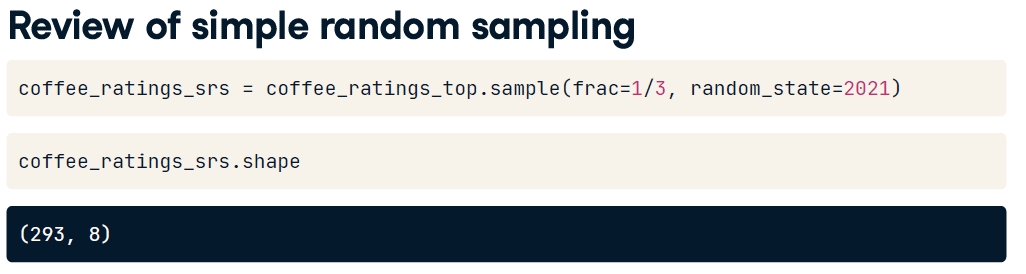

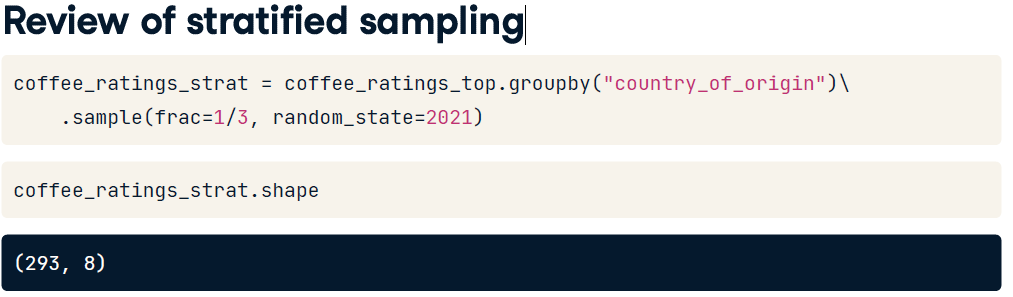

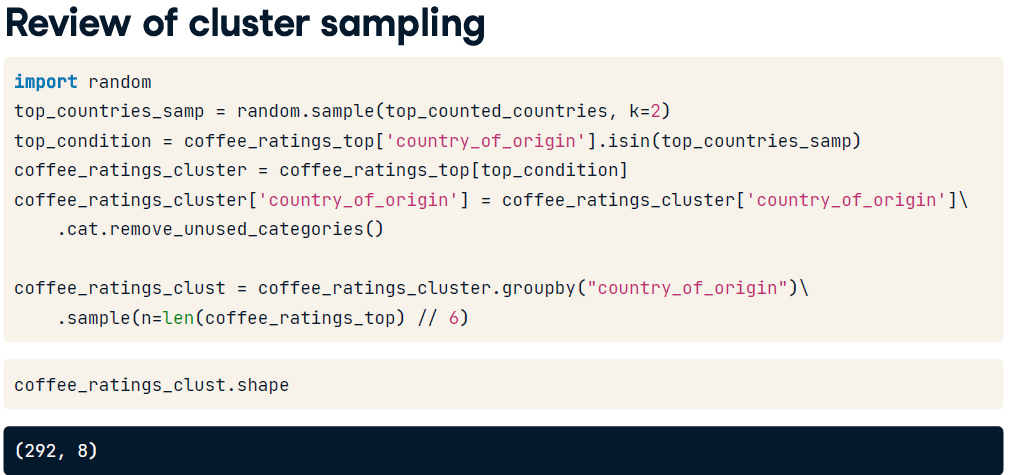

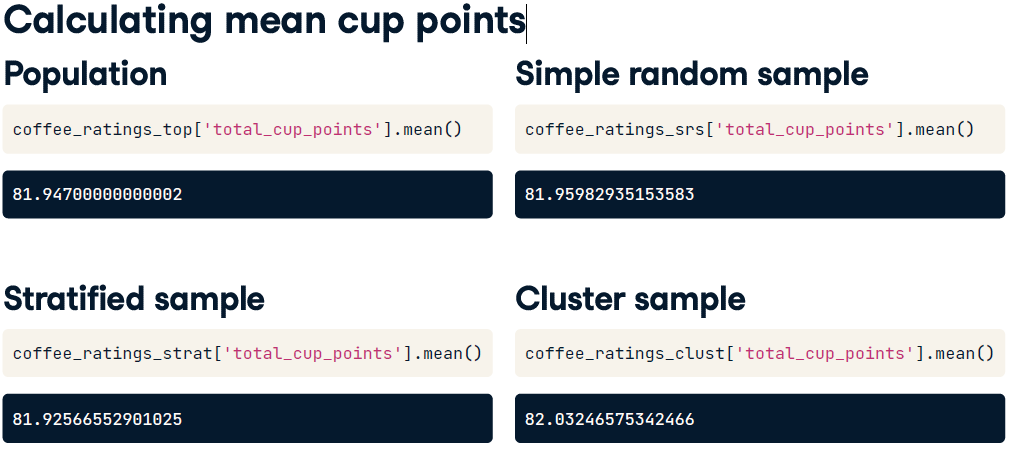

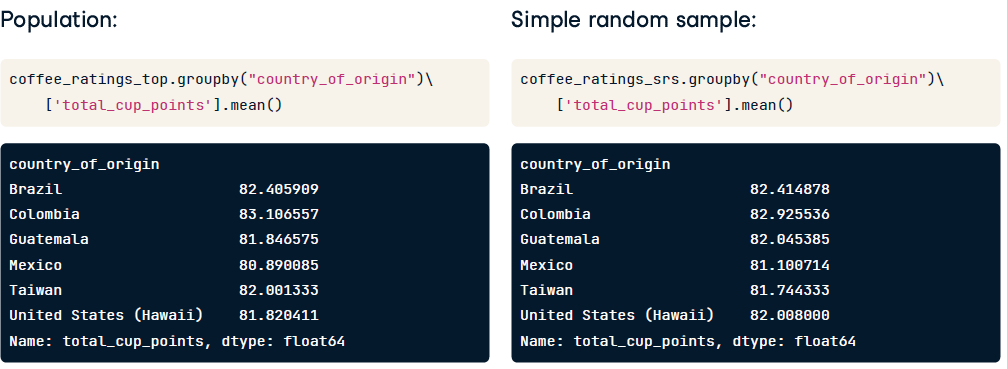

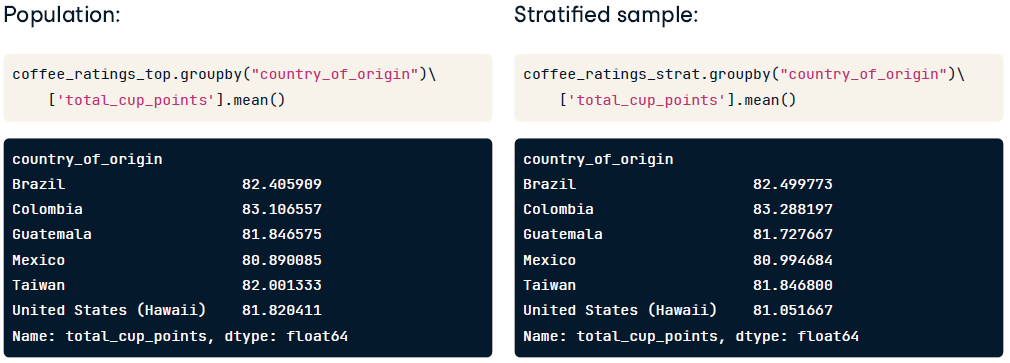

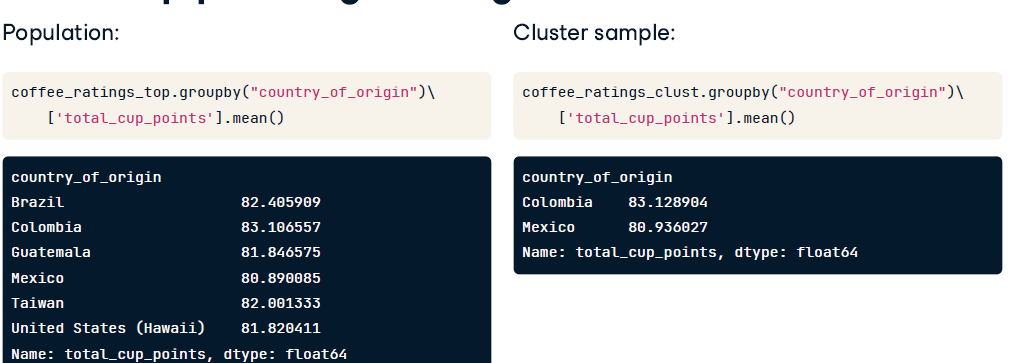

#### E1// three types of sapling
You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the RelationshipSatisfaction column of the attrition_pop dataset, which categorizes the employee's relationship with the company. It has four levels: Low, Medium, High, and Very_High. pandas has been loaded with its usual alias, and the random package has been loaded.
**e1//Perform simple random sampling on attrition_pop to get one-quarter of the population, setting the seed to 2022.<br>e2//Perform stratified sampling on attrition_pop to sample one-quarter of each RelationshipSatisfaction group, setting the seed to 2022.<br>e3//Create a list of unique values from attrition_pop's RelationshipSatisfaction column.<br>
Randomly sample satisfaction_unique to get two values.<br>
Subset the population for rows where RelationshipSatisfaction is in satisfaction_samp and clear any unused categories from RelationshipSatisfaction; assign to attrition_clust_prep.<br>
Perform cluster sampling on the selected satisfaction groups, sampling one quarter of the population and setting the seed to 2022**

In [47]:
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)   ##e1
print(attrition_srs.shape)
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=.25,random_state=2022)   ##e2
print(attrition_strat.shape)

(368, 31)
(368, 31)


In [50]:
attrition_pop.shape

(1470, 31)

In [52]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique =list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique,k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)

attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n=len(attrition_pop)//4,random_state=2022,replace=True)
attrition_clust

C:\Users\hp\AppData\Local\Temp\ipykernel_19300\3127921375.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1087,36,0.0,Travel_Rarely,796,Research_Development,12,Doctor,Medical,Very_High,Female,...,Excellent,Medium,0,15,2,Good,14,8,7,8
881,36,0.0,Travel_Rarely,1351,Research_Development,26,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,10,2,Good,3,2,0,2
577,26,0.0,Travel_Rarely,1066,Research_Development,2,College,Medical,Very_High,Male,...,Excellent,Medium,0,8,2,Better,8,7,1,3
887,30,0.0,Travel_Rarely,793,Research_Development,16,Below_College,Life_Sciences,Medium,Male,...,Excellent,Medium,1,10,2,Good,10,0,0,8
1164,37,0.0,Travel_Rarely,1372,Research_Development,1,Bachelor,Life_Sciences,Very_High,Female,...,Excellent,Medium,0,17,3,Better,17,12,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,33,0.0,Non-Travel,1283,Sales,2,Bachelor,Marketing,Very_High,Female,...,Excellent,Very_High,0,13,2,Good,11,7,1,7
281,40,0.0,Travel_Frequently,1184,Sales,2,Master,Medical,Medium,Male,...,Excellent,Very_High,3,5,2,Better,0,0,0,0
832,44,1.0,Travel_Rarely,621,Research_Development,15,Bachelor,Medical,Low,Female,...,Excellent,Very_High,1,10,2,Better,10,7,0,5
1347,58,0.0,Travel_Rarely,1272,Research_Development,5,Bachelor,Technical_Degree,High,Female,...,Excellent,Very_High,1,24,3,Better,6,0,0,4


#### E2/ Comparing point estimates
Now that you have three types of sample (simple, stratified, and cluster), you can compare point estimates from each sample to the population parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the proportion of employees who left the company (they have an Attrition value of 1) for each value of RelationshipSatisfaction
**Group attrition_pop by RelationshipSatisfaction levels and calculate the mean of Attrition for each level.<br>
2
Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the simple random sample, attrition_srs.<br>
3
Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the stratified sample, attrition_strat.<br>
4
Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the cluster sample, attrition_clust.**

In [55]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()
# Print the result
print('mean_attrition_pop',mean_attrition_pop)

# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()
# Print the result
print('mean_attrition_srs',mean_attrition_srs)

# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()
# Print the result
print('mean_attrition_strat',mean_attrition_strat)

# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()
# Print the result
print('mean_attrition_clust',mean_attrition_clust)

mean_attrition_pop RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64
mean_attrition_srs RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64
mean_attrition_strat RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64
mean_attrition_clust RelationshipSatisfaction
Medium       0.163488
Very_High    0.136240
Name: Attrition, dtype: float64


# 19.3//The n's justify the means
## 19.3.1/ An ample sample
Main lesspn--more sample more accurate result
#### E/ Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.
**e1///Generate a simple random sample from attrition_pop of fifty rows, setting the seed to 2022.<br>
Calculate the mean employee Attrition in the sample.<br>
Calculate the relative error between mean_attrition_srs50 and mean_attrition_pop as a percentage.<br>
e2///Calculate the relative error percentage again. This time, use a simple random sample of one hundred rows of attrition_pop.**

In [59]:
mean_attrition_pop=attrition_pop.Attrition.mean()
print(mean_attrition_pop)
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50,random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100*abs(mean_attrition_pop-mean_attrition_srs50)/(mean_attrition_pop)

# Print rel_error_pct50
print(rel_error_pct50)
#############################################
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=1000,random_state=2022) 

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100*abs(mean_attrition_pop-mean_attrition_srs100)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

0.16122448979591836
62.78481012658227
1.9999999999999931


## 19.3.2/ Baby back dist-rib-ution
A distribution of replicates of sample means, or other point estimates, is known as a sampling distribution.<br>
After each calculation of the for loop, we append the result, also called a replicate
#### E1/ Replicating samples
When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.
**Replicate the provided code so that it runs 500 times. Assign the resulting list of sample means to mean_attritions.**

[0.26666666666666666, 0.23333333333333334, 0.2, 0.16666666666666666, 0.25]


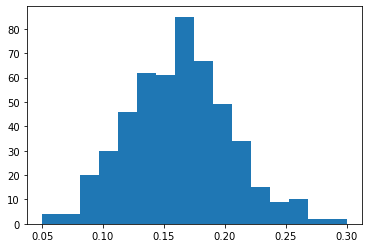

In [64]:
# Create an empty list
mean_attritions=[]
# Loop 500 times to create 500 sample means
for i in range(500):       ########## if we increase it the range of x axis is decreased
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])
plt.hist(mean_attritions,bins=16)
plt.show()

we saw that while increasing the number of replicates didn't affect the relative error of the sample means; it did result in a more consistent shape to the distribution. As the sample size increases, the range of calculated sample means tends to decrease.

## 19.3.3/ put our samples to the test


In [3]:
import pandas as pd
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [6]:
import itertools
#help(itertools)
print(6**4)

1296


In [7]:
dice = expand_grid(
{'die1': [1, 2, 3, 4, 5, 6],
'die2': [1, 2, 3, 4, 5, 6],
'die3': [1, 2, 3, 4, 5, 6],
'die4': [1, 2, 3, 4, 5, 6]})
dice

,die1,die2,die3,die4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
1291,6,6,6,2
1292,6,6,6,3
1293,6,6,6,4
1294,6,6,6,5


      die1  die2  die3  die4  mean_roll
0        1     1     1     1       1.00
1        1     1     1     2       1.25
2        1     1     1     3       1.50
3        1     1     1     4       1.75
4        1     1     1     5       2.00
...    ...   ...   ...   ...        ...
1291     6     6     6     2       5.00
1292     6     6     6     3       5.25
1293     6     6     6     4       5.50
1294     6     6     6     5       5.75
1295     6     6     6     6       6.00

[1296 rows x 5 columns]


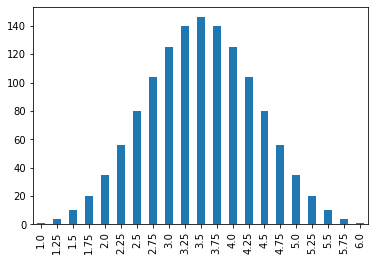

In [16]:
##adding a new column mean_roll
dice['mean_roll'] = (dice['die1'] +dice['die2'] +dice['die3'] +dice['die4']) / 4
print(dice)
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()

### The number of outcomes increases fast
If we increase the number of dice in our scenario, the number of possible outcomes increases by a factor of six each time. These values can be shown by creating a DataFrame with two columns: n_dice, ranging from 1 to 100, and n_outcomes, which is the number of possible outcomes, calculated using six to the power of the number of dice. With just one hundred dice, the number of outcomes is about the same as the **number of atoms in the universe: six-point-five times ten to the seventy-seventh power.** Long before you start dealing with big datasets, it becomes computationally impossible to calculate the exact sampling distribution. **That means we need to rely on approximations**

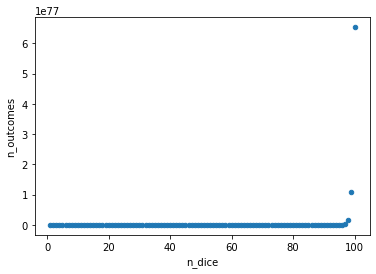

In [11]:
n_dice = list(range(1, 101))
n_outcomes = []
for n in n_dice:
    n_outcomes.append(6**n)
outcomes = pd.DataFrame({"n_dice": n_dice,"n_outcomes": n_outcomes})
outcomes.plot(x="n_dice",y="n_outcomes",kind="scatter")
plt.show()

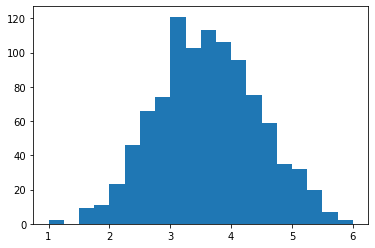

In [15]:

sample_means_1000 = []
for i in range (1000):
    sample_means_1000.append( np.random.choice(list(range(1,7)), size=4, replace=True).mean())
#print(sample_means_1000)
plt.hist(sample_means_1000, bins=20)
plt.show()

Here's a histogram of the approximate sampling distribution of mean rolls. This time, it uses the simulated rather than the exact values. It's known as an approximate sampling distribution. 

#### E1/ Exact sampling distribution
To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)
**Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, named die1 to die5. The rows should contain all possibilities for throwing five dice, each numbered 1 to 8.<br>e2//Add a column, mean_roll, to dice, that contains the mean of the five rolls as a categorical.
    

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


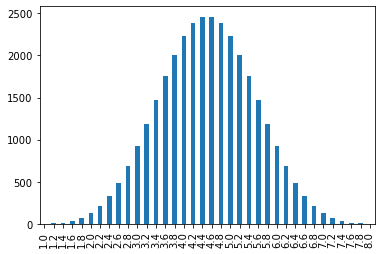

In [30]:
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': list(range(1,9)),
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1']+dice['die2'] +dice['die3'] +dice['die4']+dice['die5'])/5
                     
                    
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

#### E/ Approximate sampling distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is (8**5), which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

**e1//Sample one to eight, five times, with replacement. Assign to five_rolls.
Calculate the mean of five_rolls.<br>e2//Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.<br>e3//

[3.2, 4.2, 5.2, 4.4, 4.4, 4.6, 4.4, 3.8, 3.8, 4.8, 3.2, 4.0, 4.4, 4.6, 6.0, 5.0, 5.2, 5.8, 4.4, 5.6]


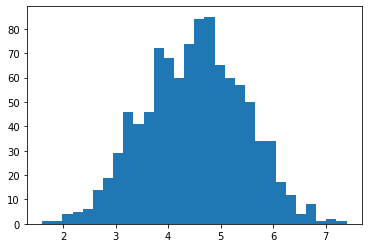

In [33]:
five_rolls = np.random.choice(list(range(1,9)), size=5, replace=True)
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean())
print(sample_means_1000[:20])
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000,bins=30)
plt.show()

In [36]:
np.random.choice(list(range(1,9)), size=5, replace=True)

array([8, 2, 6, 3, 5])

## 19.3.4/  Err on the side of Gaussian
The means of independent samples have normal distributions. <br>
Then, as the sample size increases, we see two things. {1}The distribution of these averages gets closer to being normal, and {2} the width of this sampling distribution gets narrower.
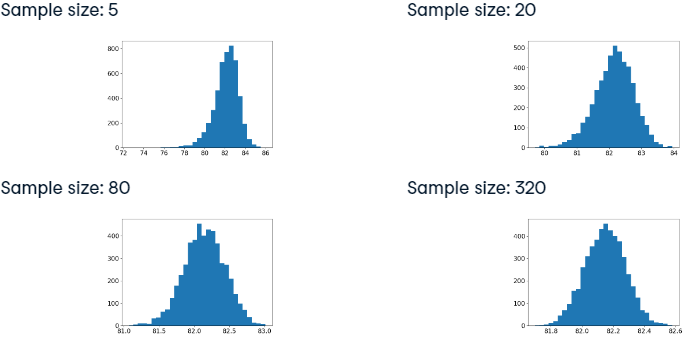

if we take the mean of our sample means, we can see that we get values that are pretty close to the population parameter when the sample size increses. Same thing is happen with standard deviation.<br>
Note that when we are calculating a population standard deviation with pandas.std(), we must specify ddof=0, as .std() calculates a sample standard deviation by default. When we are calculating a standard deviation on a sample of the population using NumPy's std function, like in these calculations on the sampling distribution, we must specify a ddof=1. 
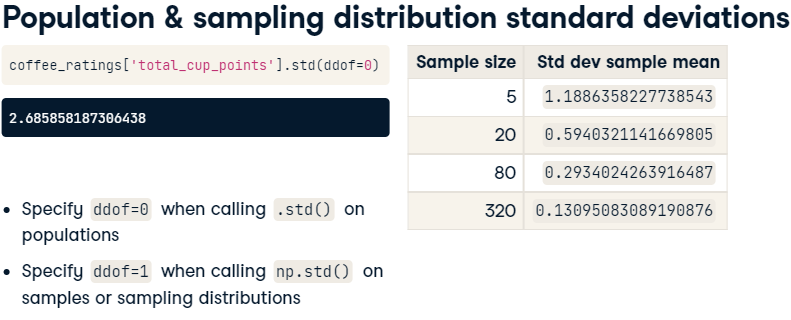
his standard deviation of the sampling distribution has a special name: the **standard error.** It is useful in a variety of contexts, from estimating population standard deviation to setting expectations on what level of variability we would expect from the sampling process.

In [65]:
print(attrition_pop['Attrition'].mean())
sampling_distribution_5=[]
sampling_distribution_50=[]
sampling_distribution_500=[]
for i in range(1000):
    sampling_distribution_5.append(attrition_pop.sample(n=5)['Attrition'].mean())
    sampling_distribution_50.append(attrition_pop.sample(n=50)['Attrition'].mean())
    sampling_distribution_500.append(attrition_pop.sample(n=500)['Attrition'].mean())
print(np.mean(sampling_distribution_5),np.mean(sampling_distribution_50),np.mean(sampling_distribution_500))

0.16122448979591836
0.152 0.16304000000000002 0.16113999999999998


How does sample size affect the mean of the sample means?<br>
As the sample size increases, the mean of the sampling distribution decreases until it reaches the population mean.<br>
As the sample size increases, the mean of the sampling distribution increases until it reaches the population mean.<br>
Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean.(correct)<br>
Regardless of sample size, the mean of the sampling distribution is biased and cannot approximate the population mean.<br>

In [54]:
print(attrition_pop['Attrition'].std(ddof=0))

0.36773788720495787


In [66]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5,ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50,ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500,ddof=1)
# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.15710086148930147
0.052129414689557715
0.013730000470244454


**The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.**

In [67]:
from math import sqrt
print(attrition_pop['Attrition'].std(ddof=0)/sqrt(5))
print(attrition_pop['Attrition'].std(ddof=0)/sqrt(50))
print(attrition_pop['Attrition'].std(ddof=0)/sqrt(500))

0.16445738273848717
0.052005990748367883
0.01644573827384872


# 19.4//Pull Your Data Up By Its Bootstraps
## 19.4.1// Introduction to bootstrapping
Sampling without replacement is like dealing a pack of cards. When we deal the ace of spades to one player, we can't then deal the ace of spades to another player. Sampling with replacement is like rolling dice. If we roll a six, we can still get a six on the next roll. Sampling with replacement is sometimes called resampling. We'll use the terms interchangeably.

In [94]:
coffee_focus = coffee_ratings[["variety", "country_of_origin", "flavor"]]
coffee_focus = coffee_focus.reset_index()
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [95]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
#Setting frac to 1 produces a sample of the same size as the original dataset.
print(coffee_resamp)
coffee_resamp["index"].value_counts()

      index         variety       country_of_origin  flavor
816     816         Bourbon               Guatemala    7.50
1204   1204          Typica                  Mexico    7.00
981     981          Catuai                  Brazil    7.42
187     187  Yellow Bourbon                  Brazil    8.00
805     805         Caturra                Colombia    7.33
...     ...             ...                     ...     ...
144     144            SL34                   Kenya    7.75
78       78         Caturra              Costa Rica    7.58
1089   1089  Yellow Bourbon                  Taiwan    7.25
880     880         Bourbon                  Brazil    7.42
933     933            None  United States (Hawaii)    7.33

[1338 rows x 4 columns]


687     7
222     5
1005    5
361     5
821     5
       ..
986     1
97      1
274     1
643     1
880     1
Name: index, Length: 863, dtype: int64

In [96]:
print(len(coffee_resamp["index"].unique()))
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset="index"))
num_unique_coffees

863


863

That means that some coffees didn't end up in the resample. By taking the number of distinct index values in the resampled dataset, using len on drop_duplicates, we see that eight hundred and sixty-eight different coffees were included. By comparing this number with the total number of coffees, we can see that four hundred and seventy coffees weren't included in the resample.

In [97]:
len(coffee_ratings) - num_unique_coffees

475

### Bootstrapping
Baisc=https://www.youtube.com/watch?v=Xz0x-8-cgaQ
 With sampling, we treat the dataset as the population and move to a smaller sample. With bootstrapping, we treat the dataset as a sample and use it to build up a theoretical population. A use case of bootstrapping is to try to understand the variability due to sampling. This is important in cases where we aren't able to sample the population multiple times to create a sampling distribution.
 **First randomly sample with replacement to get a resample the same size as the original dataset<br>
   Then, calculate a statistic, such as a mean of one of the columns. Note that the mean isn't always the choice here and bootstrapping allows for complex statistics to be computed, too.<br>Then, replicate this many times to get lots of these bootstrap statistics. 

In [105]:
len(coffee_ratings)

1338

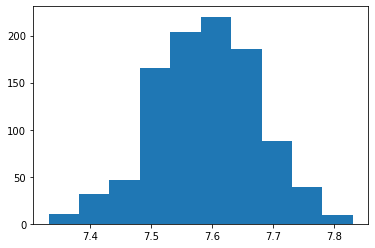

In [142]:
coffee_sample_2 = coffee_ratings.sample(n=1338)
import numpy as np
mean_flavors_1000 = []
for i in range(1000):
    mean_flavors_1000.append(
    np.mean(coffee_sample.sample(frac=1, replace=True)['flavor']))
plt.hist(mean_flavors_1000)
plt.show()

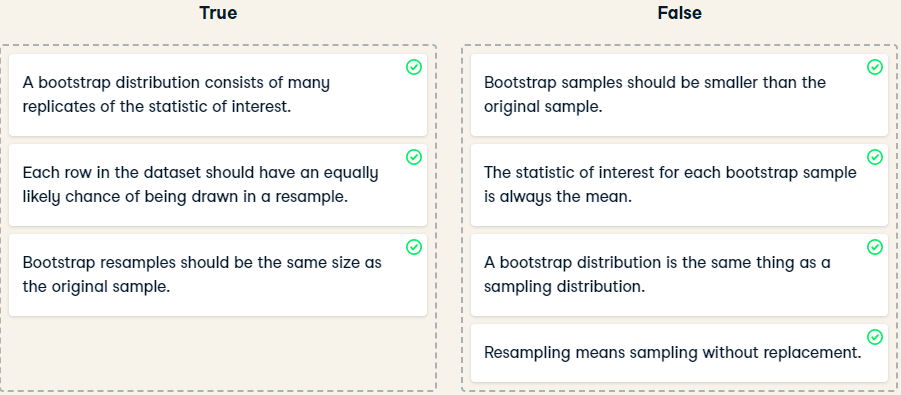

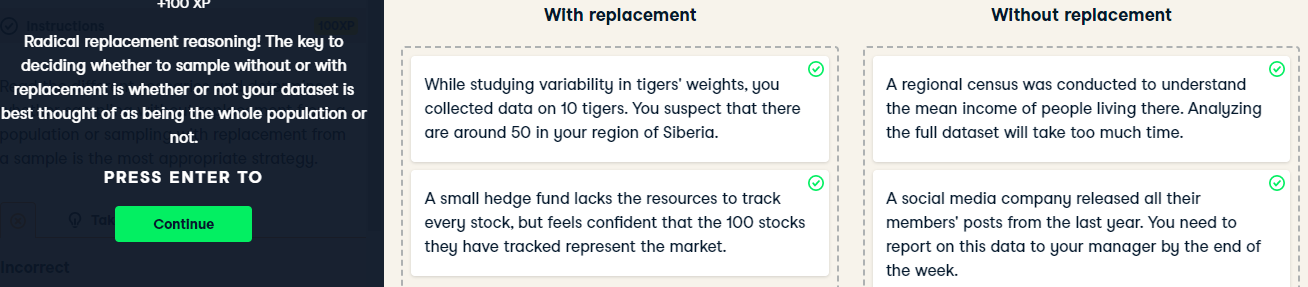

#### E/ Generating a bootstrap distribution
The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

spotify_sample is available; pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

In [143]:
#print(spotify_population.columns)
spotify_sample=spotify_population[['artists','name','danceability']]
spotify_sample=spotify_sample.reset_index()
spotify_sample.head()

,index,artists,name,danceability
0,0,['David Bauer'],Shout to the Lord,0.567
1,1,['Etta James'],Miss You,0.821
2,2,['Quasimoto'],Real Eyes,0.706
3,3,['Millencolin'],Penguins & Polarbears,0.368
4,4,['Steve Chou'],黃昏,0.501


**Generate a single bootstrap resample from spotify_sample<br>e2//Calculate the mean of the danceability column of spotify_1_resample using numpy.<br>e3//Replicate the expression provided 1000 times.//

spotify_1_resample        index                  artists  \
24653  24653        ['Cole Swindell']   
17078  17078    ['Drive-By Truckers']   
7458    7458         ['Gloria Trevi']   
39388  39388  ['Labrinth', 'Zendaya']   
16540  16540       ['Chelsea Cutler']   
...      ...                      ...   
25742  25742           ['John Mayer']   
6606    6606          ['Limp Bizkit']   
1077    1077                ['Baths']   
18068  18068              ['Kiasmos']   
37181  37181           ['Little Mix']   

                                                    name  danceability  
24653                                 Middle of a Memory         0.531  
17078                                 Never Gonna Change         0.255  
7458                                  Esa Hembra Es Mala         0.916  
39388  All For Us - from the HBO Original Series Euph...         0.348  
16540                                         The Reason         0.654  
...                                               

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


mean_danceability_1 0.5923297124063635


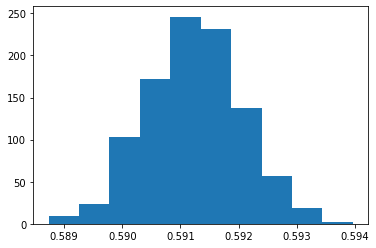

In [144]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1,replace=True)
# Print the resample
print('spotify_1_resample',spotify_1_resample)

mean_danceability_1 = np.mean(spotify_1_resample)['danceability']
# Print the result
print('mean_danceability_1',mean_danceability_1)

# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

## 19.4.2// Comparing sampling and bootstrap distributions


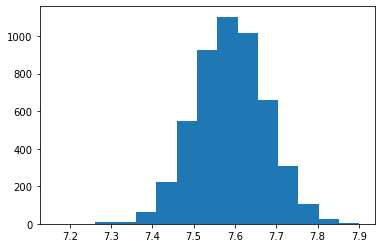

In [153]:

mean_flavors_5000 = []
for i in range(5000):
    mean_flavors_5000.append(np.mean(coffee_sample.sample(frac=1, replace=True)['flavor']))
    bootstrap_distn = mean_flavors_5000

plt.hist(bootstrap_distn, bins=15)
plt.show()

In [154]:
coffee_sample['flavor'].mean() #Sample mean:

7.587999999999999

In [155]:
np.mean(bootstrap_distn)  #Estimated population mean:

7.589943399999999

In [156]:
coffee_ratings['flavor'].mean()  #True population mean:

7.526046337817636

The behavior that you just saw is typical. The bootstrap distribution mean is usually almost identical to the original sample mean. However, that is not often a good thing. If the original sample wasn't closely representative of the population, then the bootstrap distribution mean won't be a good estimate of the population mean.**Bootstrapping cannot correct any potential biases due to differences between the sample and the population.**<br>While we do have that limitation in estimating the population mean, one great thing about distributions is that we can also quantify variation.

In [157]:
print(coffee_sample['flavor'].std()) #sample std
print(coffee_ratings['flavor'].std(ddof=0))  #true std pandas
###Estimated population standard deviation:
standard_error = np.std(bootstrap_distn, ddof=1)   ##Estimated population standard deviation
print(standard_error)
print(standard_error * np.sqrt(5000))

0.2823236912954112
0.3412548122462262
0.08541965054821964
6.040081414923129


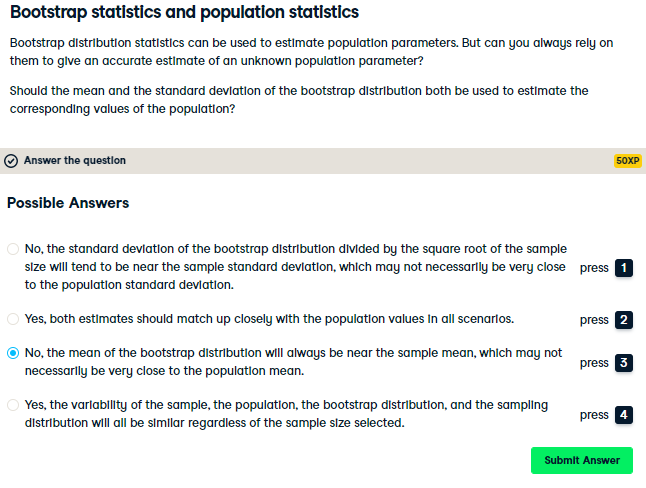

#### E/Sampling distribution vs. bootstrap distribution
The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

spotify_population (the whole dataset) and spotify_sample (500 randomly sampled rows from spotify_population) are available; pandas and numpy are loaded with their usual aliases<br>
**Generate a sampling distribution of 2000 replicates.//
Sample 500 rows of the population without replacement and calculate the mean popularity.<br>
Generate a bootstrap distribution of 2000 replicates.//
Sample 500 rows of the sample with replacement and calculate the mean popularity.

In [207]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    spotify_sample=spotify_population.sample(n=500)
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	np.mean(spotify_sample['popularity']))

# Print the sampling distribution results
print(mean_popularity_2000_samp[:20])

[54.338, 54.706, 54.56, 54.796, 55.386, 54.91, 54.76, 54.764, 55.594, 54.998, 53.688, 54.734, 55.586, 53.998, 55.162, 55.014, 54.704, 55.874, 55.618, 54.294]


In [179]:
spotify_sample

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
32592,0.000153,['Five Finger Death Punch'],0.506,217848.0,3.630800,0.995,1.0,4EJZgvebpQvxvoPTRUvWrK,0.000004,4.0,0.0459,-4.829,1.0,Burn MF,54.0,2013-07-30,0.2050,90.064,0.1780,2013.0
18041,0.021300,['Stromae'],0.659,189027.0,3.150450,0.824,0.0,60ynqVuPGEmnNqhRRehCZI,0.000141,8.0,0.3840,-8.009,1.0,carmen,45.0,2013-01-01,0.1090,150.002,0.5230,2013.0
33944,0.005510,"['Twista', 'Trey Songz']",0.668,221373.0,3.689550,0.724,1.0,7zIxcV689lVTl924lAf9Kn,0.000000,7.0,0.2180,-5.953,1.0,Girl Tonite (feat. Trey Songz),48.0,2005-10-03,0.0536,148.522,0.3180,2005.0
32912,0.146000,['Rain Sounds Factory STHLM'],0.165,202000.0,3.366667,0.598,0.0,1O3Fgs0iUziOc2JWgLxlKW,0.974000,0.0,0.3300,-22.270,0.0,Rain Sound : Dark Sky,63.0,2016-12-09,0.0708,88.004,0.0243,2016.0
39699,0.497000,['Chon Arauza Y Su Furia Colombiana'],0.616,217133.0,3.618883,0.679,0.0,1kgQqfeCwGwsbUGzsxHH90,0.000001,10.0,0.0874,-8.092,0.0,Perdóname,46.0,2001-01-01,0.0677,172.698,0.8060,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32067,0.379000,"['Taylor Swift', 'Colbie Caillat']",0.505,263973.0,4.399550,0.482,0.0,49mWEy5MgtNujgT7xU3emT,0.000000,1.0,0.1130,-7.372,1.0,Breathe,49.0,2008-11-11,0.0276,73.975,0.1840,2008.0
29006,0.016000,['Lady A'],0.576,206598.0,3.443300,0.724,0.0,0qkdE1C0ufnUISKwhg8Wh6,0.000000,0.0,0.1070,-5.147,1.0,What If I Never Get Over You,71.0,2019-11-15,0.0274,93.029,0.3400,2019.0
32290,0.020100,['Europe'],0.544,236760.0,3.946000,0.738,0.0,7c5lMuvtz2gddhDyG5MjB6,0.001380,6.0,0.0497,-9.587,0.0,The Final Countdown,58.0,2010-02-26,0.0400,117.826,0.3750,2010.0
32649,0.064000,['Eminem'],0.612,434077.0,7.234617,0.797,1.0,3IaAYtmN8T0YIYVqnxNnVz,0.000000,1.0,0.2570,-3.648,1.0,Bad Guy,60.0,2013-11-05,0.4480,81.086,0.3580,2013.0


[54.7028, 54.4964, 54.8712, 54.6708, 55.0352, 54.7136, 54.9128, 54.4844, 55.244, 54.8868, 54.932, 54.9888, 54.8684, 55.0076, 54.7444, 54.6444, 54.5504, 54.8384, 55.04, 54.7704]


(array([  14.,   88.,  333.,  859., 1342., 1285.,  765.,  233.,   73.,
           8.]),
 array([54.0996 , 54.25012, 54.40064, 54.55116, 54.70168, 54.8522 ,
        55.00272, 55.15324, 55.30376, 55.45428, 55.6048 ]),
 <BarContainer object of 10 artists>)

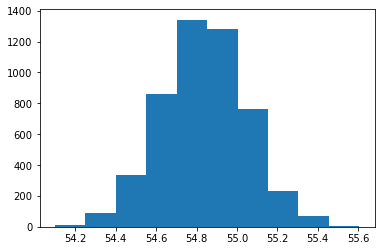

In [240]:
##for 5000
mean_popularity_5000 = []

# Generate a sampling distribution of 2000 replicates
for i in range(5000):
    
    spotify_sample_5k=spotify_population.sample(n=2500)
    mean_popularity_5000.append(
    	# Sample 500 rows and calculate the mean popularity 
    np.mean(spotify_sample_5k['popularity']))

# Print the sampling distribution results
print(mean_popularity_5000[:20])
plt.hist(mean_popularity_5000)

In [181]:
spotify_population['popularity'].sample(n=500).mean()
spotify_population.sample(n=500)['popularity'].mean()

54.316

[56.258, 55.434, 55.258, 55.854, 54.53, 54.966, 55.502, 55.924, 55.338, 55.712, 54.964, 56.19, 55.714, 56.118, 55.304, 56.35, 55.192, 55.91, 56.192, 56.964]


(array([ 11.,  50., 198., 440., 579., 450., 204.,  58.,   9.,   1.]),
 array([53.788 , 54.1586, 54.5292, 54.8998, 55.2704, 55.641 , 56.0116,
        56.3822, 56.7528, 57.1234, 57.494 ]),
 <BarContainer object of 10 artists>)

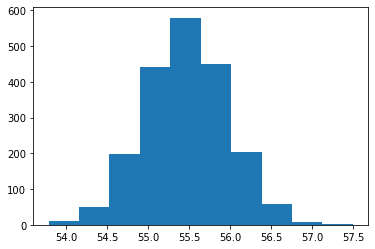

In [211]:
##for 2000
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample['popularity'].sample(n=500,replace=True).mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot[:20])
plt.hist(mean_popularity_2000_boot)

[54.7004, 54.6508, 54.6572, 55.2284, 54.5292, 54.738, 54.256, 54.7364, 54.306, 54.87, 54.7192, 54.9308, 54.7528, 55.07, 54.6388, 54.7072, 54.6228, 54.5204, 54.8492, 54.5892]


(array([  24.,  119.,  452., 1100., 1413., 1142.,  551.,  173.,   24.,
           2.]),
 array([54.0644 , 54.22312, 54.38184, 54.54056, 54.69928, 54.858  ,
        55.01672, 55.17544, 55.33416, 55.49288, 55.6516 ]),
 <BarContainer object of 10 artists>)

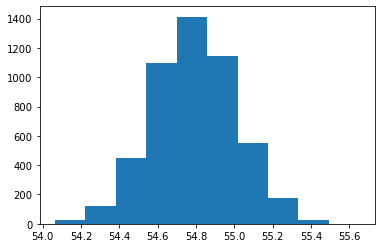

In [241]:
##for 5000
mean_popularity_5000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(5000):
    mean_popularity_5000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample_5k['popularity'].sample(frac=1,replace=True).mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_5000_boot[:20])
plt.hist(mean_popularity_5000_boot)

#### E/Compare sampling and bootstrap means

In [242]:
# Calculate the population mean popularity
pop_mean = np.mean(spotify_population['popularity'])

# Calculate the original sample mean popularity
samp_mean = np.mean(spotify_sample_5k['popularity'])

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_5000)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_5000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.7948, 54.8376592, 54.791644160000004]


In [243]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample_5k['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(mean_popularity_5000,ddof=1)*np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_5000_boot,ddof=1)*np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257204, 10.783691768743445, 14.972835684615244, 15.194878192145103]


In [226]:
##salalr put ra sample nise 5000 tai _-_ tai milse pura
np.std(mean_popularity_5000_boot,ddof=1)


0.4643097473938545

In [229]:
min(mean_popularity_5000_boot)

53.192

## 19.4.3// Confidence Interval
One way to quantify these distributions(sampling and bootstrap) is the idea of "values within one standard deviation of the mean". we'll formalize the idea of values close to a statistic by defining the term "confidence interval".<br>
lets say, weather prediction result is 47'. we see smtms 47'[40', 54'] or 47'(40',54') or 47'+-7. this 40 to 54 is CI.
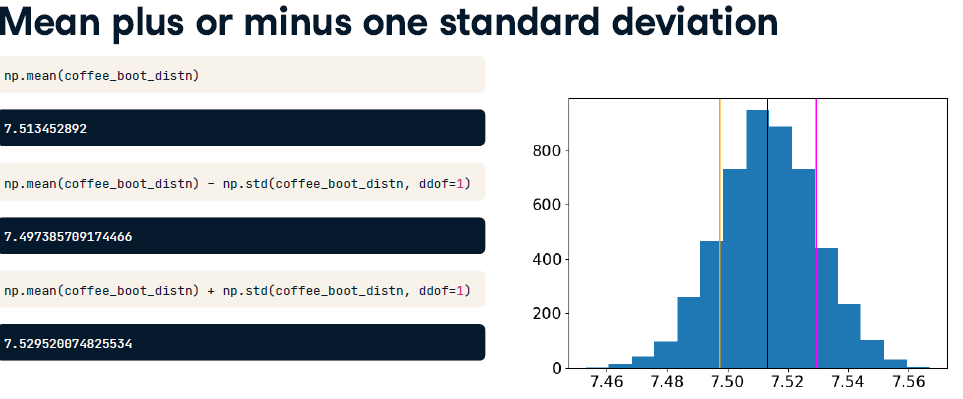

If we want the 95 percentile. we can use quantile
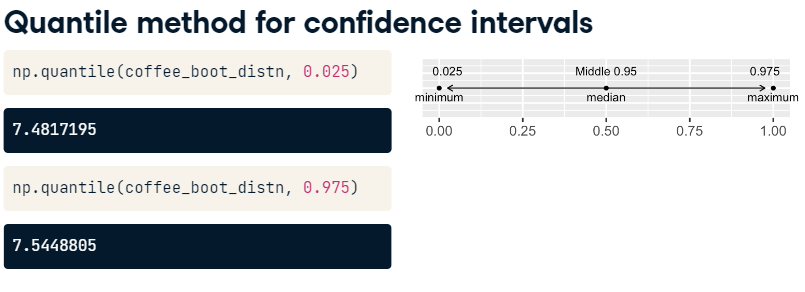

There is a second method.
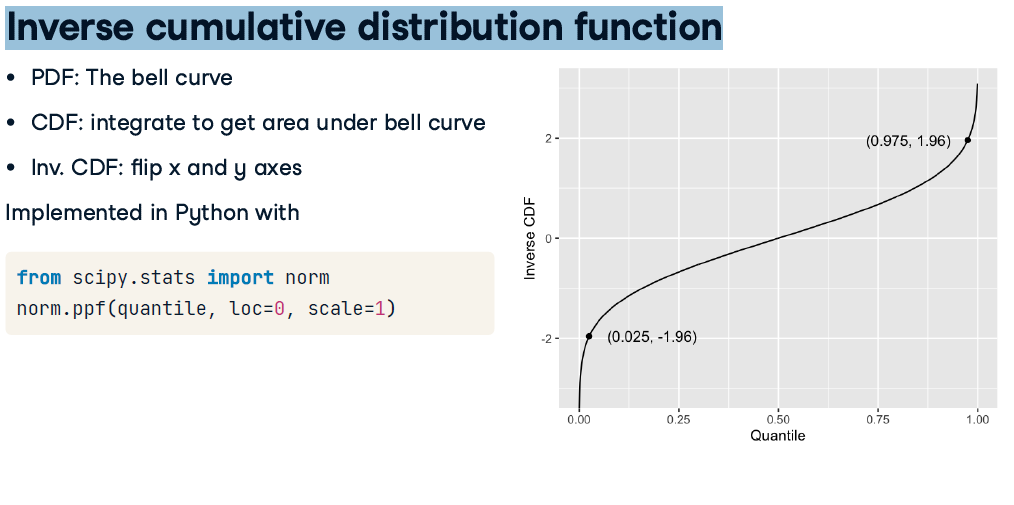

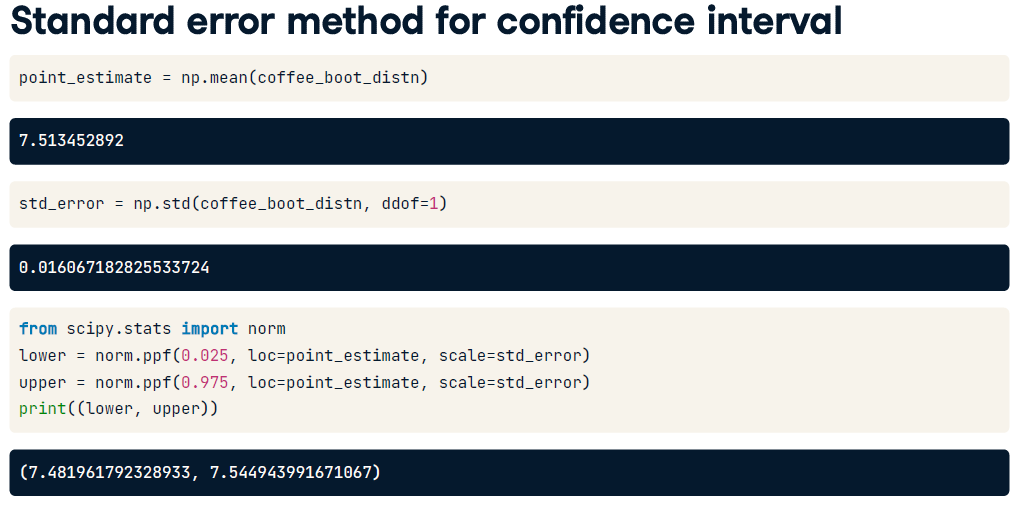

#### E/Calculating confidence intervals
You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

spotify_population, spotify_sample, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases, and norm has been loaded from scipy.stats.

In [245]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(mean_popularity_5000_boot,.025)
upper_quant = np.quantile(mean_popularity_5000_boot,.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(54.36878, 55.221210000000006)


In [247]:
from scipy.stats import norm
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(mean_popularity_5000_boot)
standard_error = np.std(mean_popularity_5000_boot,ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(.025,loc=point_estimate,scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(.975,loc=point_estimate,scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(54.370471364059576, 55.21281695594043)


## 19.4.2/ Summery

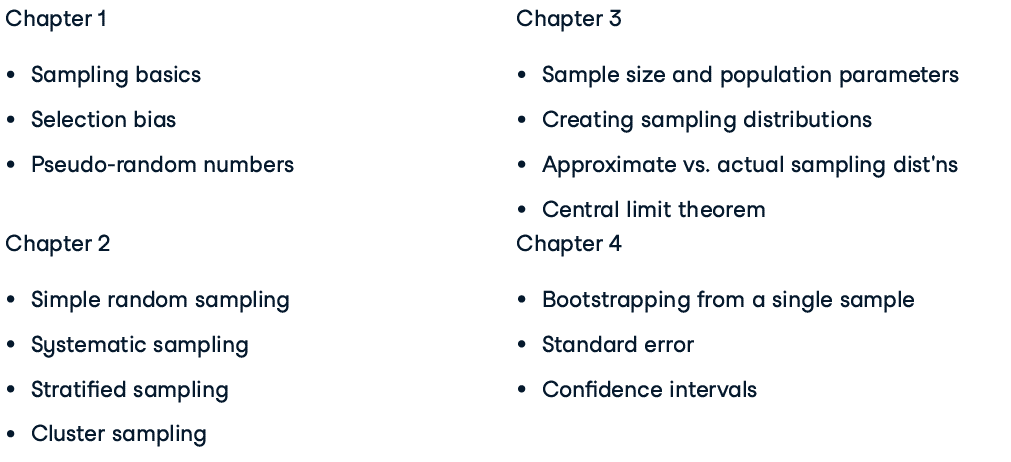
The most important things
There are two results from the last chapter that are really important for hypothesis testing, and it's important to make sure you understand them. Firstly, the standard deviation of a bootstrap distribution statistic is a good approximation for the standard error of the sampling distribution. Secondly, you calculated confidence intervals for statistics using both the quantile method and the standard error method, and they gave very similar answers. That means that the normal distribution tends to be a good approximation for bootstrap distributions